# YoloDiffusion

Yolo v5 + StableDiffusion(img2img) for colab only

### !!!! 주의 !!!! 런타임 유형 gpu로 수정할 것

구글 드라이브에 마운트해서 쓸 경우

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


알아서 설치할 주소로 바꾸면 됩니다

In [2]:
%cd ./drive/MyDrive/ColabNotebooks/YoloDiffusion

/content/drive/MyDrive/ColabNotebooks/YoloDiffusion


Yolo v5 다운

In [3]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 16003, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 16003 (delta 21), reused 20 (delta 12), pack-reused 15967
Receiving objects: 100% (16003/16003), 14.66 MiB | 14.80 MiB/s, done.
Resolving deltas: 100% (10987/10987), done.


Yolo v5 필요 라이브러리 다운

In [3]:
%cd yolov5
%pip install -qr requirements.txt comet_ml

/content/drive/MyDrive/ColabNotebooks/YoloDiffusion/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 567.2/567.2 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.0/190.0 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.8/615.8 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.8/224.8 kB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 512.2/512.2 kB 33.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.9 MB/s eta 0:00:00


현재 경로 확인차

In [4]:
%pwd

'/content/drive/MyDrive/ColabNotebooks/YoloDiffusion/yolov5'

초기 사진 url 및 프롬프트 + 저장 파일 이름

In [61]:
filename = "example02.jpg"
url = "https://hips.hearstapps.com/hmg-prod/images/domestic-cat-lies-in-a-basket-with-a-knitted-royalty-free-image-1592337336.jpg?crop=0.88889xw:1xh;center,top&resize=1200:*"
input_prompt = "watercolors"

초기 사진 저장 단계

YOLOv5 🚀 v7.0-225-gbb9706e Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 48.2/78.2 GB disk)


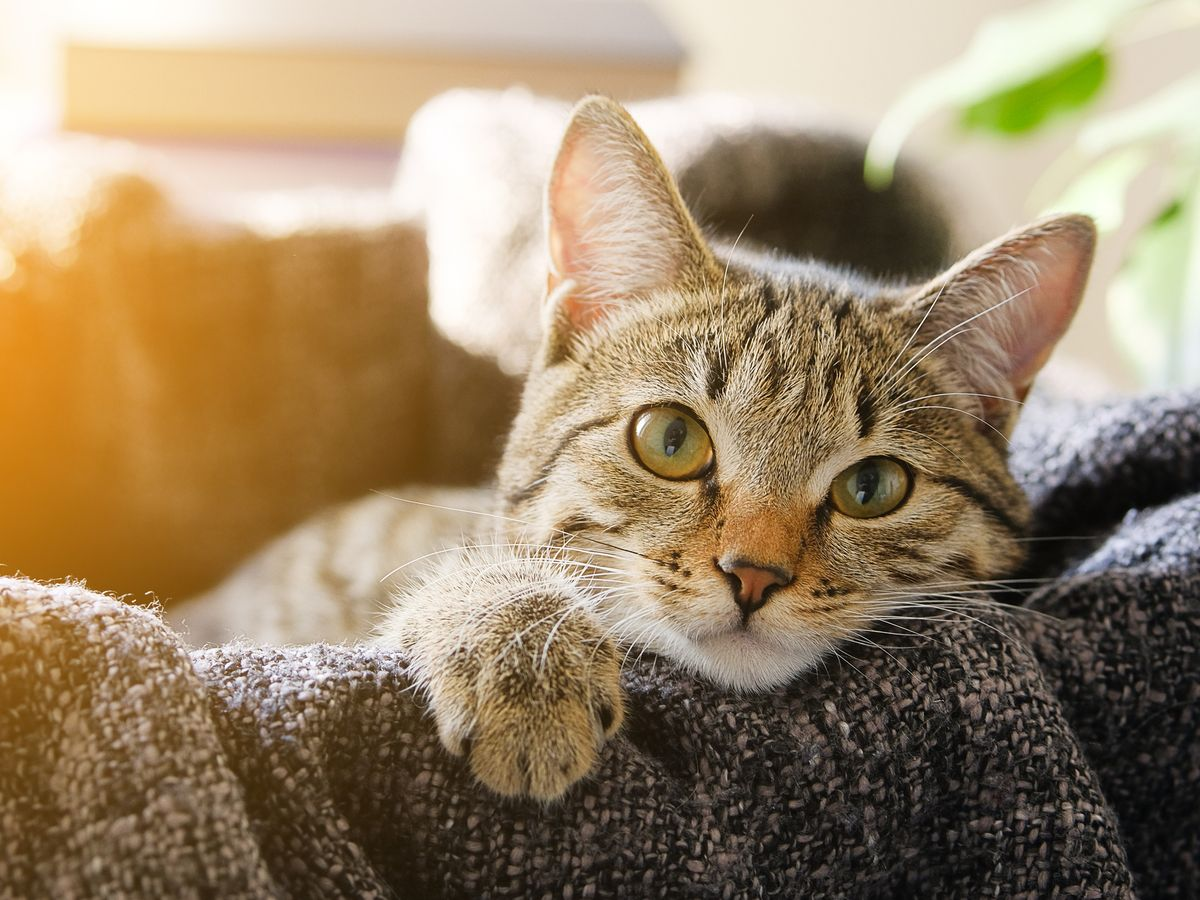

In [62]:
import requests
from PIL import Image


fileroute = f"../{filename}"
data = requests.get(url).content

f = open(fileroute,'wb')

f.write(data)
f.close()

import torch
import utils
display = utils.notebook_init()
display.Image(filename=fileroute,width=600)

# !매우 중요! detect.py 지우고 그 자리에 imp_detect.py 파일로 대체하기


초기 사진에 Yolo v5 적용 단계


YOLOv5 🚀 v7.0-225-gbb9706e Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/1 /content/drive/MyDrive/ColabNotebooks/YoloDiffusion/example02.jpg: 480x640 1 cat, 9.6ms
Speed: 0.6ms pre-process, 9.6ms inference, 6.7ms NMS per image at shape (1, 3, 640, 640)
Results saved to ../exp


cat
{'cat': 1}

Data: {'cat': 1}


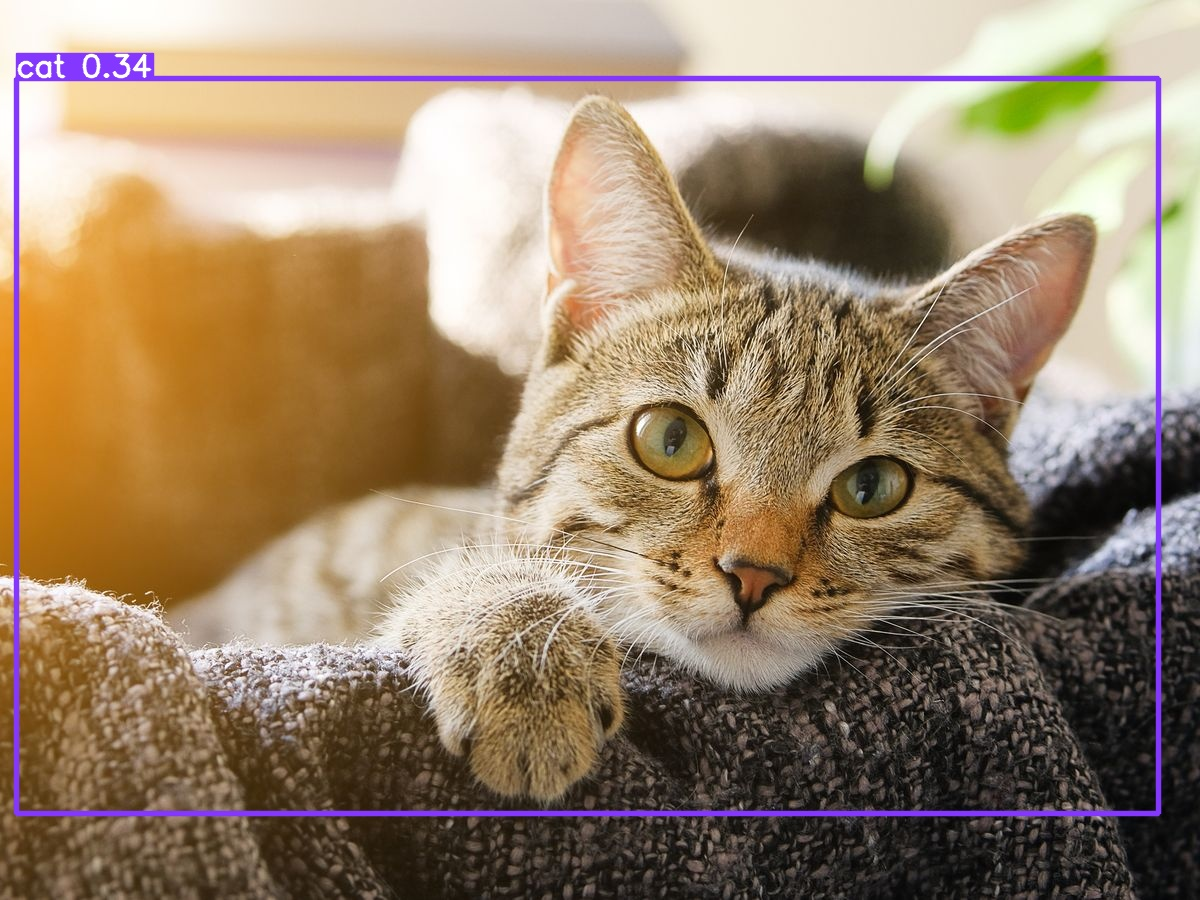

In [63]:
import imp_detect

data = imp_detect.run(source=fileroute,project='../')
print(f"\nData: {data}")

exp_route = f"../exp/{filename}"
display.Image(filename=exp_route,width=600)

문자열화 + concat 단계

In [64]:
yolo_prompt = "There is "

flag = False
for key, value in data.items():
  if not flag:
    yolo_prompt += f"{value} {key}"
    flag = True
  else:
    yolo_prompt += f",{value} {key}"

yolo_prompt += ". "

concat_prompt = yolo_prompt + input_prompt
print(concat_prompt)

There is 1 cat. watercolors


stable diffusion img2img 필요 라이브러리 다운

In [65]:
!pip install diffusers==0.11.1
!pip install transformers scipy ftfy accelerate

프롬프트 적용된 YoloDiffusion img2img 단계

이미지 1개 출력

text_encoder/pytorch_model.fp16.safetensors not found


Fetching 29 files:   0%|          | 0/29 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/40 [00:00<?, ?it/s]

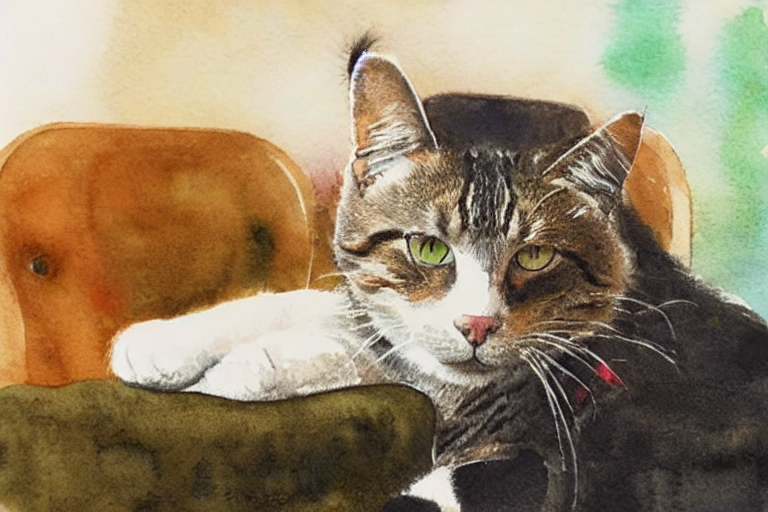

In [68]:
import requests
import torch
from PIL import Image
from io import BytesIO

from diffusers import StableDiffusionImg2ImgPipeline

device = "cuda"
model_id_or_path = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(model_id_or_path, torch_dtype=torch.float16)
pipe = pipe.to(device)

response = requests.get(url)
init_image = Image.open(BytesIO(response.content)).convert("RGB")
init_image = init_image.resize((768, 512))

images = pipe(prompt=concat_prompt, image=init_image, strength=0.8, guidance_scale=7.5).images
exitroute = f"../result/{filename}"
images[0].save(exitroute)
images[0]

변형된 사진 3개씩 출력하고자 하는 경우

  0%|          | 0/40 [00:00<?, ?it/s]

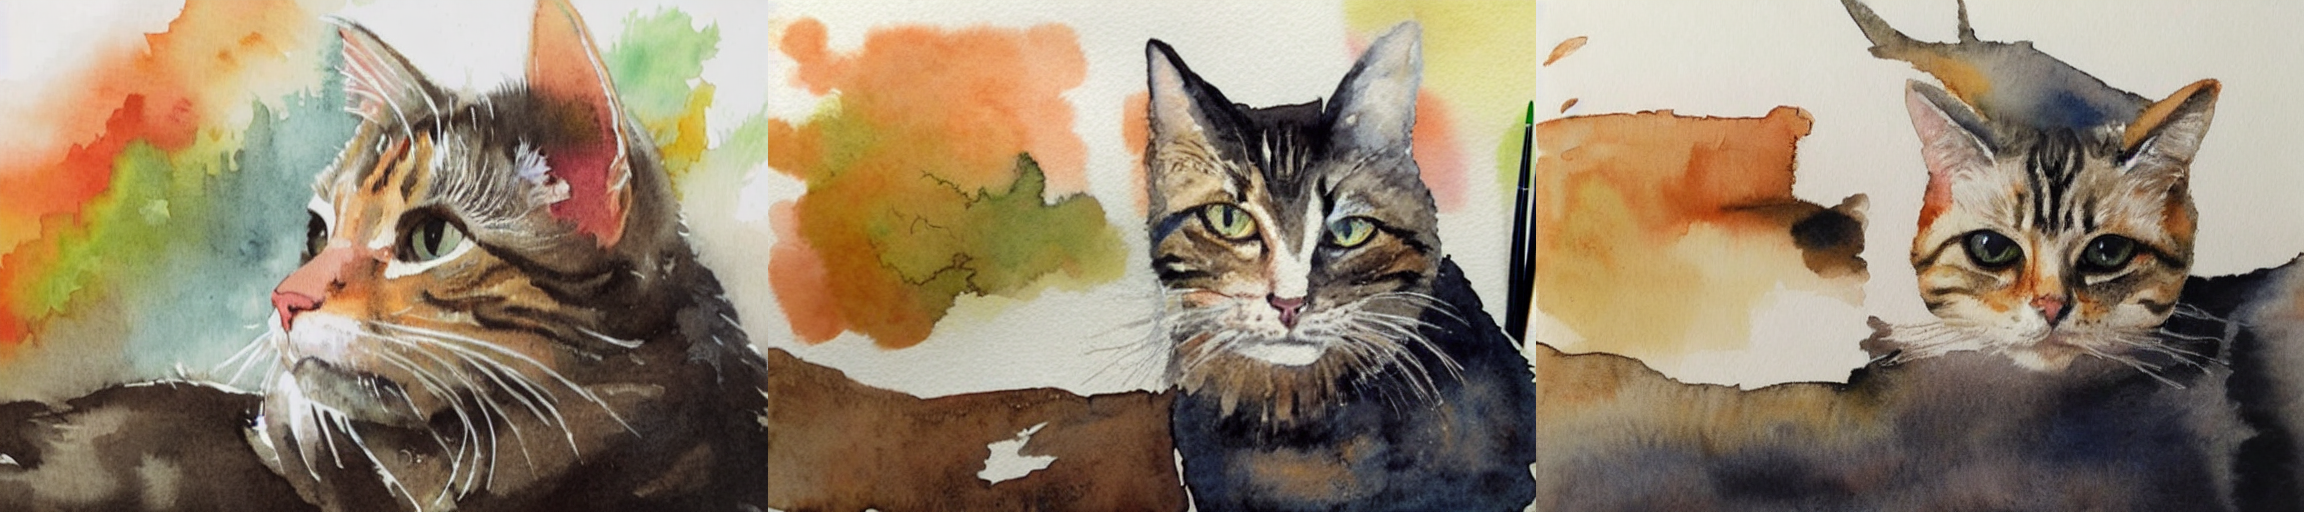

In [73]:
from PIL import Image

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

num_images = 3
prompt = [concat_prompt] * num_images

images = pipe(prompt=prompt, image=init_image, strength=0.8, guidance_scale=7.5).images

grid = image_grid(images, rows=1, cols=3)
grid